# Support Vector Machine Classifier
The basis on which [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVMs) work is the principle that it is always possible to transform any set of data so that the classes within it can be separated linearly. This is a powerful idea, and the technique used to transform data into linearly separable space is actually referred to as the **Kernel *trick*.**

In this post we will see some basic math for SVM classifiers, learn about the kernel trick, and implement a  SVM algorithm in Python. Clearly there is a lot of ground to cover, so lets get started!

## The Best Line

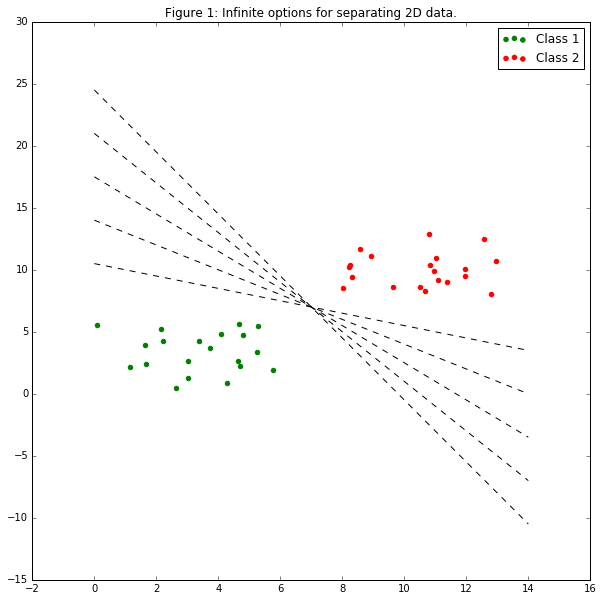

In [290]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
np.random.seed(1234)
x1 = np.random.uniform(0, 6, 20)
y1 = np.random.uniform(0, 6, 20)
x2 = np.random.uniform(8, 13, 20)
y2 = np.random.uniform(8, 13, 20)
plt.scatter(x1, y1, label = 'Class 1', color = 'g');
plt.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
coeffs = [(b, 7 - b*7) for b in np.arange(-2.5, 0, 0.5)]
for (b, c) in coeffs:
    plt.plot(x, b*x + c, linestyle = '--', color = 'k');
plt.title('Figure 1: Infinite options for separating 2D data.')
plt.legend();
plt.savefig('Figure1.png')

Looking at the figure above, we can see that even in the simplest scenario of 2-class linearly separable data, there are an infinite number of possible decision boundaries (or separating hyperplanes) that can be drawn. So regardless of the dimension of our data, the key question is: how do we know which one is the "best" one given unseen data?

The SVM approach to deciding the best separating hyperplane given any data is to generate what is called a **maximum marginal hyperplane**.

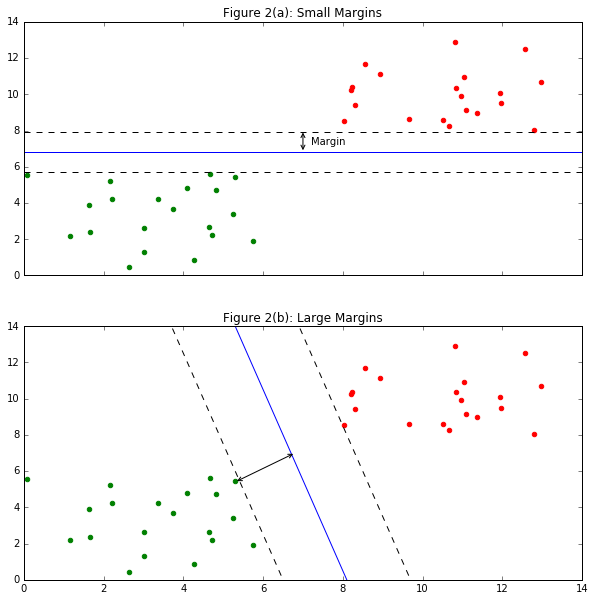

In [291]:
f, (ax1, ax2) = plt.subplots(2, sharex = True, sharey = True, figsize = (10,10))
ax1.axis([0, 14, 0, 14])
ax1.scatter(x1, y1, label = 'Class 1', color = 'g');
ax1.scatter(x2, y2, label = 'Class 2', color = 'r');
ax1.axhline(y = (7.9+5.7)/2);
for x in [5.7, 7.9]:
    ax1.axhline(y = x, linestyle = '--', color = 'k');
ax1.annotate('', xy = (7, (7.9+5.7)/2), xycoords = 'data', xytext = (7,8), textcoords = 'data',arrowprops={'arrowstyle': '<->'})
ax1.annotate(s = 'Margin', xy = (7.2,7.2), xycoords = 'data')
ax1.set_title('Figure 2(a): Small Margins')

ax2.scatter(x1, y1, label = 'Class 1', color = 'g');
ax2.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
ax2.plot(x, (-5*x + 48.5 + -5*x + 32.5)/2);
ax2.plot(x, -5*x + 48.5, linestyle = '--', color = 'k')
ax2.plot(x, -5*x + 32.5, linestyle = '--', color = 'k')
ax2.annotate('', xy = (5.3, 5.4), xycoords = 'data', xytext = (6.8,7), textcoords = 'data',arrowprops={'arrowstyle': '<->'})
ax2.set_title('Figure 2(b): Large Margins')
f.savefig('Figure2.png')

Margins are defined as the smallest perpendicular distance between the separating hyperplane and any of the data points as illustrated in Figure 2. Here we see two possible separating hyperplanes, with (a) having smaller margins than (b). The general rule that SVM follows is that a hyperplane with larger margins, such as the one in (b), provides for greater generalisation accuracy.

Intuitively the idea is that as more data points are added, the hyperpane with the larger margin will be more accurate at classifying future data than the hyperpane with the smaller margin. That is, it is more likely that the hyperplane in (b) will separate unseen data with higher accuracy than the hyperplane in (a).

This is why the SVM looks for the maximum marginal hyperplane, that is, the hyperplane with the largest margin.

## Linear Hyperplane
Lets start with developing the math for the simple two class problem in which the classes are linearly separable.

Let the data be a set of N training feature vectors $\{\mathbf{x}_i\}$ for $i = 1, ..., N$, that are each assigned to one of two classes, $\omega_1$ and $\omega_2$, with labels $t_i = \pm 1$. Here the separating hyperplane can be defined as:
$$y(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x}+b$$.

Here the $\mathbf{w} = {w_1, w_2, ..., w_N}$ is the weight vector and $b$ is the bias.

The classification rule is defined as follows: $y(\mathbf{x}_i) > 0$ for points having $t_i = + 1$ and $y(\mathbf{x}_i) < 0$ for points having $t_i = - 1$ for all of the training points. 

Based on this rule, and assuming a linearly separable feature space, there exists at least one choice of the parameters $\mathbf{w}$ and $b$ so that $t_{i}y(\mathbf{x}_i) > 0$ for all the training feature points. Thus the separating hyperplane is specified by $$\mathbf{w}^{T}\mathbf{x}+b = 0$$.

### Margins
For a given $M > 0$, we can also define that any point $\mathbf{x}_i$ either $y(\mathbf{x}_i) \geq M$ such that $t_i = + 1$ or $y(\mathbf{x}_i) \leq -M$ such that $t_i = - 1$. Thus we can write the following:

$\mathbf{w}^{T}\mathbf{x}+b \geq M$ for $y_i = +1$

$\mathbf{w}^{T}\mathbf{x}+b \leq -M$ for $y_i = -1$

or equivalently

$t_i(\mathbf{w}^{T}\mathbf{x}_i+b) \geq M$

The distance of any point $\mathbf{x}_i$ from the separating hyperplane is $\frac{|y(x)|}{||\mathbf{w}||}$. Here $||\mathbf{w}||$ is the Euclidean norm of $\mathbf{w}$ i.e. $\sqrt{\mathbf{w}^T\mathbf{w}}$. As we want all points to be correctly classified, we know that $t_{i}y(\mathbf{x_i}) > M > 0$ for all $i$. So the distance of a point $\mathbf{x_i}$ to the separating hyperplane is given by:

$$\frac{t_{i}y(\mathbf{x_i})}{||\mathbf{w}||} = \frac{t_{i}(\mathbf{w}^{T}\mathbf{x}_i+b)}{||\mathbf{w}||} \geq \frac{M}{||\mathbf{w}||}$$

From the equation above it is also clear that all points are at least $\frac{M}{||\mathbf{w}||}$ in perpendicular distance to the separating hyperplane. Thus the maximal margin possible is $\frac{2M}{||\mathbf{w}||}$.

We can take M = 1 (i.e. rescale $\mathbf{w}$ and $b$ by dividing by M) without impacting the distance measure to define the *canonical hyperplanes* as below: 

$H_1: \mathbf{w}^{T}\mathbf{x}+b \geq 1$ for $y_i = +1$

$H_2: \mathbf{w}^{T}\mathbf{x}+b \leq -1$ for $y_i = -1$

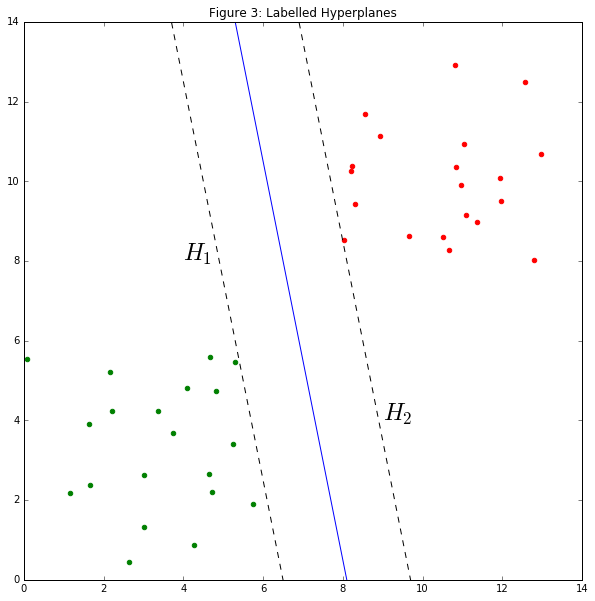

In [292]:
plt.figure(figsize = (10,10))
plt.axis([0, 14, 0, 14])
plt.scatter(x1, y1, label = 'Class 1', color = 'g');
plt.scatter(x2, y2, label = 'Class 2', color = 'r');
x = np.linspace(0, 14, 20)
plt.plot(x, (-5*x + 48.5 + -5*x + 32.5)/2);
plt.plot(x, -5*x + 48.5, linestyle = '--', color = 'k')
plt.plot(x, -5*x + 32.5, linestyle = '--', color = 'k')
plt.annotate(r'$H_1$', xy = (4, 8), xycoords = 'data', fontsize = 24)
plt.annotate(r'$H_2$', xy = (9, 4), xycoords = 'data', fontsize = 24)
plt.title('Figure 3: Labelled Hyperplanes')
plt.savefig('Figure3.png')

### TODO: MATH TO BE CONTINUED

## Algorithm Pseudocode 
From "Machine Learning - an Algorithmic Perspective by Stephen Marsland"
### Instantiation
- For the specified kernel, and kernel parameters, compute the kernel of distances between the datapoints.
    - compute $K = XX^T$
    - for the linear kernel, return $K$, for the polynomial kernel of degree d return $\frac{1/\sigma}{K^d}$
    - for the RBF kernel, compute $K = \exp\left(\frac{-(x - x^T)^2}{2\sigma}\right)$

### Training
- assemble the constraint set as matrices to solve:
    - $\min_{x} \frac{1}{2} X^T t_i t_j K x + q^t x$ subject to $Gx \leq h, Ax = b$
- pass these matrices to the solver
- identify the support vectors as those that are within some specified distance of the closest point and dispose of the rest of the data
- compute $b^*$ using 
    - $\frac{1}{N_s} \sum_{\mbox{support vectors j}} \left( t_j - \sum_{t=1}^{n} \lambda_i t_i x_i^T x_j \right)$
    
### Classification
- for the given test data $\mathbf{z}$, use the support vectors to classify the data for releant kernel using:
    - compute the inner product of the test data and the support vectors
    - perform the classification as $\sum_{i=1}^{n} \lambda_i t_i K(x_i, z) + b^*$, returning either the label (hard classification) or the value (soft classifcation).

## Implementation of the Algorithm

We will be using the `cvxopt` solver in the code below, so if you are following along you will also need to download it using `pip install cvxopt`.

In [293]:
import numpy as np
import numpy.linalg as la
import cvxopt.solvers

class svmClassifier:
    
    def __init__(self,  kernel = 'poly', degree = 1, C = None, sigma = 1, kappa = None, delta = None):
        self.kernel = kernel
        self.degree = degree
        self.C = C
        self.sigma = sigma
        self.kappa = kappa
        self.delta = delta

    def definedKernels(self, kernel, X, sigma, degree, N, kappa, delta):
        if kernel == 'poly' and degree == 1:
            return np.inner(X, X)
        if kernel == 'poly' and degree > 1:
            return (1. + np.dot(X, X.T)) ** degree
        if kernel == 'rbf':
            self.K = np.inner(X, X)
            self.xsquared = (np.diag(self.K)*np.ones((1, self.N))).T
            b = np.ones((self.N, 1))
            self.K -= 0.5*(np.dot(self.xsquared, b.T) + np.dot(b, self.xsquared.T))
            return np.exp(self.K/(2.*self.sigma**2))
        if kernel == 'sigmoid':
            return np.tanh(kappa * np.dot(X, X) - delta)
        else:
            print("Error: incorrect kernel. Choose from 'poly', 'rbf' or 'sigmoid'")
            return
        
    def classifier(self, Y, soft = False):
        if self.kernel == 'poly':
            K = (1. + 1./self.sigma * np.dot(Y, self.X.T)) ** self.degree
            
            self.y = np.zeros((np.shape(Y)[0], 1))
            for j in range(np.shape(Y)[0]):
                for i in range(self.nsupport):
                    self.y[j] += self.lambdas[i] * self.targets[i] * K[j, i]
                self.y[j] += self.b
            if soft:
                return self.y
            else:
                return np.sign(self.y)
            
        elif self.kernel == 'rbf':
            K = np.dot(Y,self.X.T)
            c = (1./self.sigma * np.sum(Y**2,axis=1)*np.ones((1,np.shape(Y)[0]))).T
            c = np.dot(c,np.ones((1,np.shape(K)[1])))
            aa = np.dot(self.xsquared[self.sv],np.ones((1,np.shape(K)[0]))).T
            K = K - 0.5*c - 0.5*aa
            K = np.exp(K/(2.*self.sigma**2))

            self.y = np.zeros((np.shape(Y)[0],1))
            for j in range(np.shape(Y)[0]):
                for i in range(self.nsupport):
                    self.y[j] += self.lambdas[i]*self.targets[i]*K[j,i]
                self.y[j] += self.b

            if soft:
                return self.y
            else:
                return np.sign(self.y)
            
        ## TODO: implement same for 'rbf' and 'sigmoid'
        else:
            print "Error: incorrect kernel. Choose from 'poly', 'rbf' or 'sigmoid'"
            return
        
    def trainSVM(self, X, targets):
        self.N = np.shape(X)[0]
        self.K = self.definedKernels(self.kernel, X, self.sigma, self.degree, self.N, self.kappa, self.delta)
        
        P = cvxopt.matrix(targets * targets.transpose() * self.K)
        q = cvxopt.matrix(-1 * np.ones((self.N, 1)))
        
        if self.C is None:
            G = cvxopt.matrix(-1 * np.eye(self.N))
            h = cvxopt.matrix(np.zeros((self.N, 1)))
        else:
            G = cvxopt.matrix(np.concatenate((np.eye(self.N), -np.eye(self.N))))
            h = cvxopt.matrix(np.concatenate((self.C * np.ones((self.N, 1)), np.zeros((self.N, 1)))))
        A = cvxopt.matrix(targets.reshape(1, self.N))
        b = cvxopt.matrix(0.0)
        
        convexOptimsationSolution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        solutionLambdas = np.array(convexOptimsationSolution['x'])
        
        self.sv = np.where(solutionLambdas > 1e-5)[0]
        self.nsupport = len(self.sv)
        print("The algorithm found", self.nsupport, "support vectors.")
        
        self.X = X[self.sv, :]
        self.lambdas = solutionLambdas[self.sv]
        self.targets = targets[self.sv]
             
        self.b = np.sum(self.targets)
        for n in range(self.nsupport):
            self.b -= np.sum(self.lambdas * self.targets * np.reshape(self.K[self.sv[n], self.sv], (self.nsupport, 1)))
            self.b /= len(self.lambdas)
        
        self.classifier = self.classifier

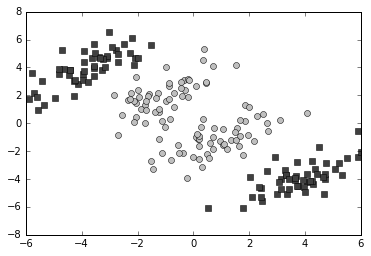

In [294]:
import pylab as pl
# Make some 2D data
linsep = False
overlap = False

if linsep:
	# Case 1: Linearly separable
	if overlap:
		cov = [[2.0,1.0],[1.0,2.0]]
	else:
		cov = [[0.8,0.6],[0.6,0.8]]

	train0 = np.random.multivariate_normal([0.,2.], cov, 100)
	train1 = np.random.multivariate_normal([2.,0.], cov, 100)
	train = np.concatenate((train0,train1),axis=0)
	test0 = np.random.multivariate_normal([0.,2.], cov, 20)
	test1 = np.random.multivariate_normal([2.,0.], cov, 20)
	test = np.concatenate((test0,test1),axis=0)

	labeltrain0 = np.ones((np.shape(train0)[0],1))
	labeltrain1 = -np.ones((np.shape(train1)[0],1))
	labeltrain = np.concatenate((labeltrain0,labeltrain1),axis=0)
	labeltest0 = np.ones((np.shape(test0)[0],1))
	labeltest1 = -np.ones((np.shape(test1)[0],1))
	labeltest = np.concatenate((labeltest0,labeltest1),axis=0)

else:
	# Case 2: Not linearly separable
	cov = [[1.5,1.0],[1.0,1.5]]
	train0a = np.random.multivariate_normal([-1.,2.], cov, 50)
	train0b = np.random.multivariate_normal([1.,-1.], cov, 50)
	train0 = np.concatenate((train0a,train0b),axis=0)
	train1a = np.random.multivariate_normal([4.,-4.], cov, 50)
	train1b = np.random.multivariate_normal([-4.,4.], cov, 50)
	train1 = np.concatenate((train1a,train1b),axis=0)
	train = np.concatenate((train0,train1),axis=0)

	test0a = np.random.multivariate_normal([-1.,2.], cov, 50)
	test0b = np.random.multivariate_normal([1.,-1.], cov, 50)
	test0 = np.concatenate((test0a,test0b),axis=0)
	test1a = np.random.multivariate_normal([4.,-4.], cov, 50)
	test1b = np.random.multivariate_normal([-4.,4.], cov, 50)
	test1 = np.concatenate((test1a,test1b),axis=0)
	test = np.concatenate((test0,test1),axis=0)

	labeltrain0 = np.ones((np.shape(train0)[0],1))
	labeltrain1 = -np.ones((np.shape(train1)[0],1))
	labeltrain = np.concatenate((labeltrain0,labeltrain1),axis=0)
	labeltest0 = np.ones((np.shape(test0)[0],1))
	labeltest1 = -np.ones((np.shape(test1)[0],1))
	labeltest = np.concatenate((labeltest0,labeltest1),axis=0)

pl.figure()
pl.plot(train0[:,0], train0[:,1], "o",color="0.75")
pl.plot(train1[:,0], train1[:,1], "s",color="0.25")

In [295]:
svm = svmClassifier(kernel = 'rbf')

In [296]:
print(np.shape(train), np.shape(labeltrain))

((200L, 2L), (200L, 1L))


In [297]:
svm.trainSVM(train, labeltrain)

     pcost       dcost       gap    pres   dres
 0: -1.0120e+01 -3.1384e+01  4e+02  2e+01  2e+00
 1: -5.7758e+00 -3.1765e+01  5e+01  1e+00  2e-01
 2: -9.7729e+00 -2.5564e+01  2e+01  2e-01  3e-02
 3: -1.4217e+01 -1.9365e+01  6e+00  6e-02  7e-03
 4: -1.6346e+01 -1.7825e+01  2e+00  1e-02  1e-03
 5: -1.7134e+01 -1.7509e+01  4e-01  2e-03  2e-04
 6: -1.7364e+01 -1.7439e+01  7e-02  7e-15  9e-16
 7: -1.7421e+01 -1.7428e+01  7e-03  2e-15  1e-15
 8: -1.7427e+01 -1.7427e+01  9e-05  5e-15  1e-15
 9: -1.7427e+01 -1.7427e+01  9e-07  3e-15  8e-16
Optimal solution found.
('The algorithm found', 25, 'support vectors.')


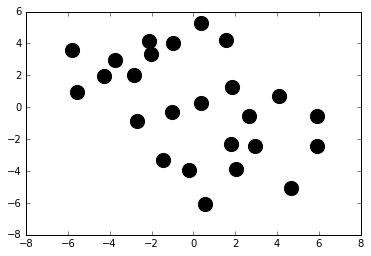

In [298]:
pl.scatter(svm.X[:,0], svm.X[:,1], s=200,color= 'k')

In [299]:
predict = svm.classifier(test,soft=False)
correct = np.sum(predict == labeltest)
print correct, np.shape(predict)
print float(correct)/np.shape(predict)[0]*100., "test accuracy"

200 (200L, 1L)
100.0 test accuracy


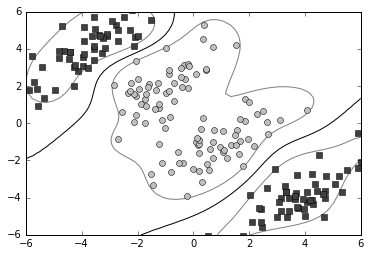

In [300]:
# Classify points over 2D space to fit contour
x,y = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
xx = np.reshape(np.ravel(x),(2500,1))
yy = np.reshape(np.ravel(y),(2500,1))
points = np.concatenate((xx,yy),axis=1)
outpoints = svm.classifier(points,soft=True).reshape(np.shape(x))
pl.contour(x, y, outpoints, [0.0], colors='k', linewidths=1, origin='lower')
pl.contour(x, y, outpoints + 1, [0.0], colors='grey', linewidths=1, origin='lower')
pl.contour(x, y, outpoints - 1, [0.0], colors='grey', linewidths=1, origin='lower')

pl.axis("tight")
pl.plot(train0[:,0], train0[:,1], "o",color="0.75")
pl.plot(train1[:,0], train1[:,1], "s",color="0.25")
pl.show()

## Limitations of SVM